In [53]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.utils import to_categorical

In [54]:
(X_train, y_train), (X_test, y_test) =datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [55]:
X_test.shape

(10000, 32, 32, 3)

In [56]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [57]:
y_train= y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [58]:
classes = ["airplane", "automobile", "bird", "cat", "deer","dog","frog","horse","ship","truck"]

In [59]:
classes[9]

'truck'

In [60]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

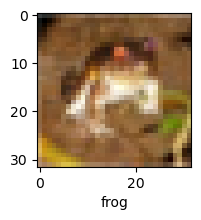

In [61]:
plot_sample(X_train, y_train, 0)

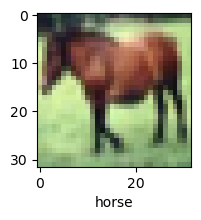

In [62]:
plot_sample(X_train, y_train, 7)

In [63]:
X_train = X_train/255
X_test = X_test/255

In [64]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.8108 - accuracy: 0.3550
Epoch 2/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6229 - accuracy: 0.4286
Epoch 3/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5415 - accuracy: 0.4558
Epoch 4/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4822 - accuracy: 0.4770
Epoch 5/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4337 - accuracy: 0.4947


In [65]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.4891 - accuracy: 0.4690


[1.4890804290771484, 0.4690000116825104]

In [66]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.55      0.55      1000
           1       0.71      0.44      0.54      1000
           2       0.36      0.44      0.39      1000
           3       0.30      0.52      0.38      1000
           4       0.58      0.20      0.30      1000
           5       0.46      0.28      0.35      1000
           6       0.55      0.48      0.51      1000
           7       0.46      0.64      0.53      1000
           8       0.73      0.43      0.54      1000
           9       0.43      0.72      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.46     10000
weighted avg       0.51      0.47      0.46     10000



In [67]:
cnn = models.Sequential([
    
        # cnn
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
    
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        
        # dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])



In [68]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [69]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4317 - accuracy: 0.4870
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0698 - accuracy: 0.6251
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9455 - accuracy: 0.6736
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8663 - accuracy: 0.6991
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7966 - accuracy: 0.7233
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7352 - accuracy: 0.7451
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6827 - accuracy: 0.7615
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6377 - accuracy: 0.7784
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5905 - accuracy: 0.7924
Epoch 10/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.

In [70]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9449 - accuracy: 0.6915


[0.9448632001876831, 0.6915000081062317]

In [71]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

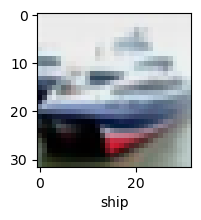

In [72]:
plot_sample(X_test, y_test, 1)

In [73]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.9243456e-02, 3.8394399e-03, 4.7233362e-02, 7.3532200e-01,
        9.7219570e-04, 2.9361583e-02, 1.2039893e-03, 8.6655200e-04,
        1.6178989e-01, 1.6752609e-04],
       [1.0440870e-05, 4.9405755e-04, 1.1578180e-07, 1.1942670e-09,
        1.6920032e-10, 1.0123087e-10, 5.2331299e-11, 3.2062169e-11,
        9.9947482e-01, 2.0583786e-05],
       [2.9915081e-02, 1.9888556e-02, 2.1861590e-04, 5.0318759e-04,
        1.5943249e-04, 9.9614379e-05, 3.6891240e-06, 4.9200800e-04,
        9.4153583e-01, 7.1839378e-03],
       [9.0534121e-01, 1.4167490e-02, 5.9874385e-04, 4.5835739e-04,
        2.3027840e-04, 9.5126588e-06, 1.0372084e-03, 2.1933872e-06,
        7.7751637e-02, 4.0329294e-04],
       [3.5272349e-04, 1.2422209e-04, 1.1327296e-02, 3.3480637e-02,
        5.0049359e-01, 4.1860556e-03, 4.4968122e-01, 4.2198990e-05,
        3.0633956e-04, 5.6847284e-06]], dtype=float32)

In [74]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [75]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

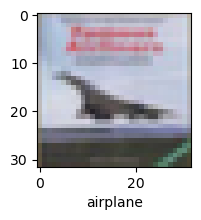

In [76]:
plot_sample(X_test, y_test, 3)

In [77]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [84]:
classes[y_classes[0]]

'cat'

In [85]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.74      0.74      1000
           1       0.84      0.76      0.80      1000
           2       0.61      0.60      0.60      1000
           3       0.48      0.48      0.48      1000
           4       0.62      0.65      0.64      1000
           5       0.54      0.65      0.59      1000
           6       0.84      0.68      0.75      1000
           7       0.74      0.76      0.75      1000
           8       0.81      0.79      0.80      1000
           9       0.76      0.81      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

